In [ ]:
# https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
# Import proper libraries.
import tensorflow as tf
from tensorflow import keras

In [2]:
# Get the dataset - readily available from keras.
mnist = keras.datasets.fashion_mnist
# Dataset is already divided in training-testing subsets.
# We need training data so that the network can "learn" the data,
# i.e., properly adjust the parameters with backpropagation.
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


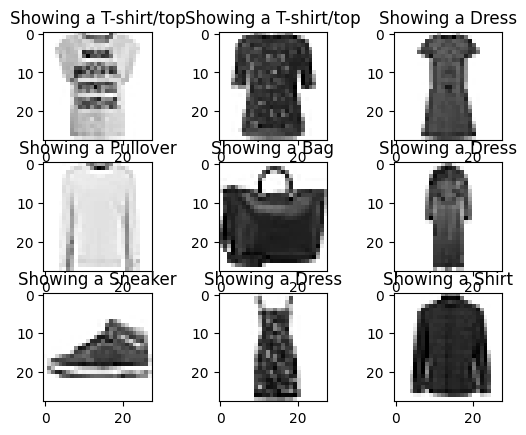

In [5]:
# Let's mix the data and see some example objects in the dataset.
import numpy as np
import matplotlib.pyplot as plt

# Mixing.
tmpidxs = np.random.permutation( X_train_full.shape[0] )[:9]

labels = np.array([
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
])

# Seeing examples.
plt.clf()
for i in range(9):
    plt.subplot(3,3,i+1)
    tmp_idx = tmpidxs[i]
    plt.imshow(X_train_full[tmp_idx,:,:], cmap='gray_r')
    plt.title('Showing a ' + labels[ y_train_full[tmp_idx] ] )
plt.show()

In [24]:
# Readjust range to float 0-1 for gradient descent training
# and get a validation set to check for overfitting during training.
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

# flatten input
# x_train = np.reshape( X_train, (len(X_train), np.prod(X_train.shape[1:])) )
# x_test = np.reshape( X_test, (len(X_test), np.prod(X_test.shape[1:])) )
# x_valid = np.reshape( X_valid, (len(X_valid), np.prod(X_valid.shape[1:])) )

print(X_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


In [28]:
# Construct a simple feedforward deep neural network (Autoencoder) 
# that learns compressed representations of data.

# Construct the encoder first - might be useful to employ the trained encoder
# as a pre-trained network for, e.g., a few-shot classification application.
encoder = keras.models.Sequential(name='encoder')
encoder.add(keras.layers.Flatten(input_shape=(28,28)))
encoder.add(keras.layers.Dense(256, activation='relu'))
encoder.add(keras.layers.Dense(64, activation='relu'))

# Then the decoder - might be usefull to employ the trained decoder as a
# pre-trained network, e.g., as a starting generator in a GAN.
decoder = keras.models.Sequential(name='decoder')
decoder.add(keras.layers.Dense(256, activation='relu'))
decoder.add(keras.layers.Dense(784, activation='sigmoid'))
decoder.add(keras.layers.Reshape((28,28)))

# Connect the two parts.
model = keras.models.Sequential( [encoder, decoder], name='autoencoder' )
# Get a summary of a model.
model.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 64)                217408    
                                                                 
 decoder (Sequential)        (None, 28, 28)            218128    
                                                                 
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Define sophisticated properties of the network with simple indicators.
# You can construct your own methods for each property, e.g., loss function,
# optimizer, evaluation metric, etc.
# CAUTION: while you can, and you should, feel free to play around with 
# different properties and methods, it is imperative that you have a basic,
# intuitive understanding of how they work. A great part of gaining experience
# in Machine Learning concerns understanding which combinations of methods
# would work for what data!
model.compile(loss='mean_squared_error',
              optimizer='adam', # try sgd
              metrics=['cosine_similarity'])

In [30]:
# Train the model for 10 epochs using backpropagation,
# while observing network behaviour on validation data.
history = model.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0202 - cosine_similarity: 0.7936 - val_loss: 0.0128 - val_cosine_similarity: 0.8086
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0116 - cosine_similarity: 0.8139 - val_loss: 0.0105 - val_cosine_similarity: 0.8161
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0100 - cosine_similarity: 0.8195 - val_loss: 0.0095 - val_cosine_similarity: 0.8200
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0092 - cosine_similarity: 0.8228 - val_loss: 0.0088 - val_cosine_similarity: 0.8227
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0086 - cosine_similarity: 0.8249 - val_loss: 0.0085 - val_cosine_similarity: 0.8240
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0083 - cosine_similarity: 0.8262 - val_loss: 0.0083 - val_cosine_similarity: 0.8250
Epoch 7/10
1719/1719 [

In [13]:
# Define a function to show the data in grayscale image.
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')

# Define a function to show a batch of random images that shows how
# well your network has learned to reconstruct new images, as a form of
# sanity check that your model indeed works.
def show_reconstruction(model, X, n_images=5):
    reconstruction_idxs = np.random.permutation(np.arange(X.shape[0]))[:n_images]
    reconstructions = model.predict(X[reconstruction_idxs])
    fig = plt.figure(figsize=(n_images*1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X[reconstruction_idxs[image_index]])
        plt.subplot(2, n_images, 1 + image_index + n_images)
        plot_image( reconstructions[image_index] )
    return reconstructions

1/1 [==============================] - 0s 72ms/step


array([[[9.95291848e-05, 1.34250178e-04, 2.99478386e-04, ...,
         2.02158946e-04, 1.84797274e-04, 2.23864801e-04],
        [1.49892556e-04, 2.74250662e-04, 7.44701028e-05, ...,
         2.92660370e-05, 1.17961245e-05, 2.57231994e-04],
        [1.31745051e-04, 4.04862112e-05, 1.23084203e-04, ...,
         4.14543356e-05, 5.79225598e-05, 1.29042426e-04],
        ...,
        [2.79599859e-04, 4.37041221e-04, 2.74226512e-03, ...,
         2.36753817e-03, 2.15361142e-04, 1.29108783e-04],
        [1.21718599e-03, 7.36681977e-04, 2.12970050e-03, ...,
         1.53766235e-03, 1.50569424e-04, 2.96095677e-04],
        [1.92263615e-04, 6.21152692e-04, 1.67968753e-03, ...,
         1.16850471e-03, 2.44626892e-04, 3.23186832e-04]],

       [[1.31856759e-05, 1.05865629e-05, 5.34936262e-05, ...,
         4.93394452e-07, 1.46035463e-05, 2.78823245e-05],
        [1.84950622e-05, 5.43066599e-05, 1.15346338e-05, ...,
         6.75049705e-08, 2.68263449e-07, 6.72418100e-05],
        [9.47297121e-06, 

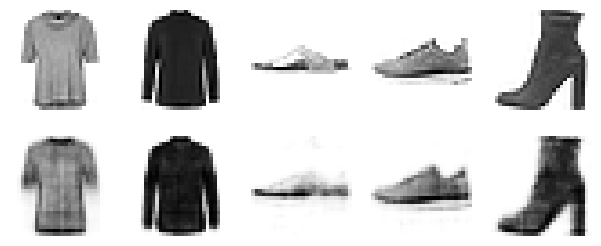

In [33]:
# Test the network to new images.
show_reconstruction(model, X_valid)

In [31]:
# Take the trained encoder and learn image categorization
# Keep the encoder "frozer" - not trainable, keep the version that was trained in the autoencoder
encoder.trainable = False
categorizer = keras.models.Sequential([
    encoder,
    keras.layers.Dense(10, activation='softmax')
], name='categorizer')

categorizer.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', # try sgd
              metrics=['accuracy'])
categorizer.summary()

Model: "categorizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 64)                217408    
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 650
Non-trainable params: 217,408
_________________________________________________________________


In [32]:
history = categorizer.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9576 - accuracy: 0.6806 - val_loss: 0.5693 - val_accuracy: 0.8036
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5372 - accuracy: 0.8104 - val_loss: 0.4807 - val_accuracy: 0.8290
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4916 - accuracy: 0.8263 - val_loss: 0.4527 - val_accuracy: 0.8416
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8311 - val_loss: 0.4465 - val_accuracy: 0.8456
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4640 - accuracy: 0.8353 - val_loss: 0.4309 - val_accuracy: 0.8514
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4582 - accuracy: 0.8363 - val_loss: 0.4343 - val_accuracy: 0.8498
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4541 - accuracy: 0.8387 - val_loss: 0.4258 - val_accuracy:

In [34]:
# As an example application, use the network to compress all validation images.
X_valid_compressed = encoder.predict(X_valid)
# See compression results - your network achieves over 1/10 size reduction!
print('original size:' , X_valid.shape, ' - in MB: ', np.prod(X_valid.shape)*4/1000000)
print('compressed size:' , X_valid_compressed.shape, ' - in MB', np.prod(X_valid_compressed.shape)*4/1000000)

157/157 [==============================] - 0s 1ms/step
original size: (5000, 28, 28)  - in MB:  15.68
compressed size: (5000, 64)  - in MB 1.28


In [35]:
# Use the compressed images to map the entire validation dataset in 2D.
# t-SNE is a good method for doing that.
from sklearn.manifold import TSNE

tsne = TSNE(verbose=2)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.879443
[t-SNE] Computed conditional probabilities in 0.133s
[t-SNE] Iteration 50: error = 78.8404465, gradient norm = 0.0204613 (50 iterations in 1.646s)
[t-SNE] Iteration 100: error = 75.3276749, gradient norm = 0.0035160 (50 iterations in 1.279s)
[t-SNE] Iteration 150: error = 74.8207397, gradient norm = 0.0019268 (50 iterations in 1.363s)
[t-SNE] Iteration 200: error = 74.6182404, gradient norm = 0.0013492 (50 iterations in 1.374s)
[t-SNE] Iteration 250: error = 74.5079041, gradient norm = 0.0011024

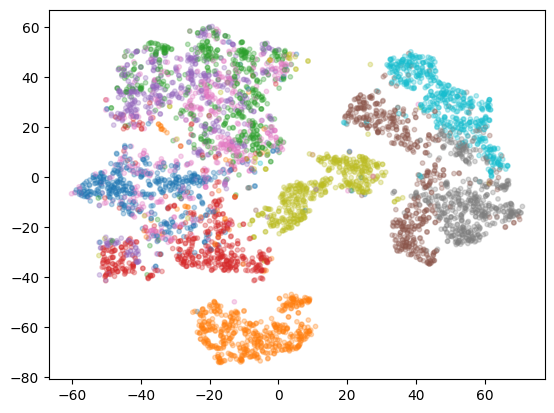

In [37]:
# Plot the 2-D data representation and observe that objects in separate
# classes, e.g. shoes, shirts, etc., are mostly well-separated.
plt.scatter(X_valid_2D[:,0], X_valid_2D[:,1], c=y_valid, s=10, cmap='tab10', alpha=0.3)

In [41]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28,28]),
    keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2)
], name='conv_encoder')

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='valid',
                                 activation='selu', input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding='same',
                                 activation='selu'),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same',
                                 activation='sigmoid'),
    keras.layers.Reshape([28, 28]),
], name='conv_decoder')

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder], name='conv_ae')

conv_encoder.summary()
conv_decoder.summary()
conv_ae.summary()

Model: "conv_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)         

In [ ]:
# With minor adjustments to the code, you can construct an entirely new
# architecture with more sophisticated and taylor-made neuron structures
# that adapt better to image data, i.e., Convolutional neurons.
# As an exercise, you can use this network to apply all the above steps:
# - compile the model,
# - train it,
# - see example reconstructions for a sanity-check on how well it performs,
# - use the network to compress data and see how much compression it achieves,
# - see how well it does on separating data on a 2-D plane.
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28,28]),
    keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2)
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='valid',
                                 activation='selu', input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding='same',
                                 activation='selu'),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same',
                                 activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_encoder.summary()
conv_decoder.summary()
conv_ae.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)         

In [42]:
conv_ae.compile(loss='mean_squared_error',
              optimizer='adam', # try sgd
              metrics=['cosine_similarity'])

In [44]:
history = conv_ae.fit(X_train, X_train, validation_data=(X_valid, X_valid), 
                      epochs=10)

Epoch 1/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0118 - cosine_similarity: 0.8131 - val_loss: 0.0093 - val_cosine_similarity: 0.8209
Epoch 2/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0084 - cosine_similarity: 0.8260 - val_loss: 0.0075 - val_cosine_similarity: 0.8280
Epoch 3/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.0070 - cosine_similarity: 0.8314 - val_loss: 0.0066 - val_cosine_similarity: 0.8321
Epoch 4/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0063 - cosine_similarity: 0.8346 - val_loss: 0.0059 - val_cosine_similarity: 0.8345
Epoch 5/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.0058 - cosine_similarity: 0.8366 - val_loss: 0.0054 - val_cosine_similarity: 0.8363
Epoch 6/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0054 - cosine_similarity: 0.8381 - val_loss: 0.0052 - val_cosine_similarity: 0.8377
Epoch 7/10
1719/

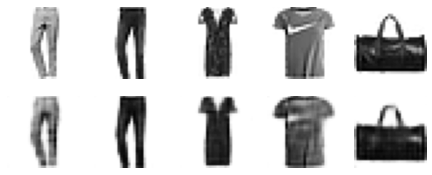

In [ ]:
show_reconstruction(conv_ae, X_valid)

In [ ]:
# compress all validation images
X_valid_compressed = conv_encoder.predict(X_valid)
print('original size:' , X_valid.shape, ' - in MB: ', np.prod(X_valid.shape)*4/1000000)
print('compressed size:' , X_valid_compressed.shape, ' - in MB', np.prod(X_valid_compressed.shape)*4/1000000)

original size: (5000, 28, 28)  - in MB:  15.68
compressed size: (5000, 3, 3, 64)  - in MB 11.52


In [ ]:
tsne = TSNE(verbose=2)
X_valid_reshaped = np.reshape(X_valid , ( X_valid.shape[0], np.prod(X_valid.shape[1:]) ) )
X_valid_2D = tsne.fit_transform( X_valid_reshaped )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.882355
[t-SNE] Computed conditional probabilities in 0.234s
[t-SNE] Iteration 50: error = 87.8519363, gradient norm = 0.0255249 (50 iterations in 2.682s)
[t-SNE] Iteration 100: error = 74.5275497, gradient norm = 0.0079305 (50 iterations in 1.881s)
[t-SNE] Iteration 150: error = 73.4778900, gradient norm = 0.0033088 (50 iterations in 1.778s)
[t-SNE] Iteration 200: error = 73.2318878, gradient norm = 0.0009073 (50 iterations in 1.813s)
[t-SNE] Iteration 250: error = 73.1503906, gradient norm = 0.0004064 (50 iterations in 1.793s)
[t-SNE] KL divergence after 250 iterations with early exa

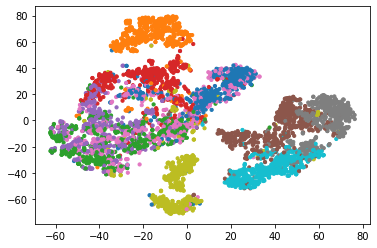

In [ ]:
# plot
plt.scatter(X_valid_2D[:,0], X_valid_2D[:,1], c=y_valid, s=10, cmap='tab10')

In [ ]:
# denoising
X_noise = X_valid + np.power(np.random.random( X_valid.shape ), 20)
X_noise[ X_noise > 1 ] = 1

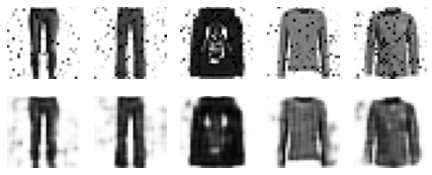

In [ ]:
show_reconstruction(conv_ae, X_noise)

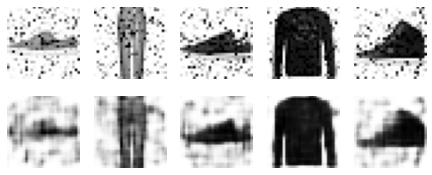

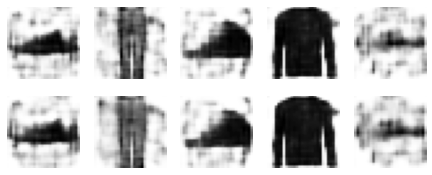

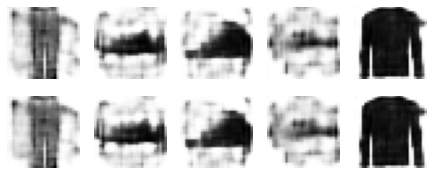

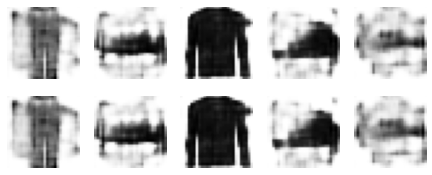

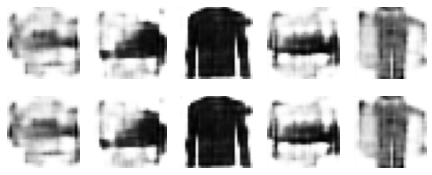

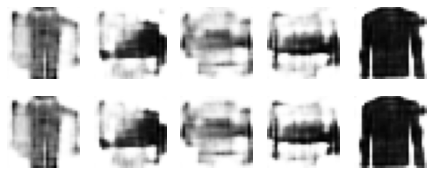

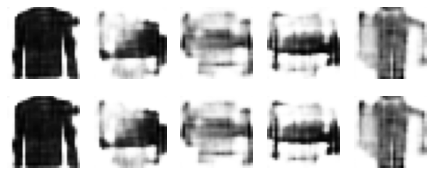

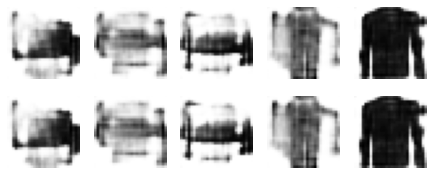

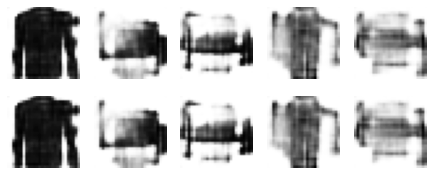

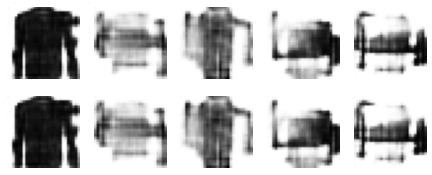

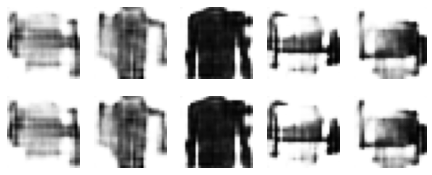

In [ ]:
# X_noise = np.random.random( X_valid.shape )
X_noise = X_valid + np.power(np.random.random( X_valid.shape ), 10)
X_noise[ X_noise > 1 ] = 1
reconstructions = show_reconstruction(conv_ae, X_noise)
for i in range(10):
    reconstructions = show_reconstruction(conv_ae, reconstructions)